# Exploratory Data Analysis (EDA) Summary: Natural Language Processing with Disaster Tweets

## Introduction

In this notebook, a comprehensive Exploratory Data Analysis (EDA) will be performed on the dataset provided in the "Natural Language Processing with Disaster Tweets" competition on Kaggle. The primary objective of this competition is to build a machine learning model capable of predicting whether a given tweet pertains to a real disaster or not. To achieve this, the dataset will be explored and analyzed to uncover underlying patterns and insights that will inform the feature engineering and model-building processes.

## Goals of EDA

1. **Understand the Dataset Structure**:
   - The columns, data types, and basic statistics of the dataset will be examined.
   - The presence of any missing or null values will be identified.

2. **Analyze the Target Variable**:
   - The distribution of the target variable will be explored to understand the balance between disaster-related and non-disaster-related tweets.

3. **Text Data Exploration**:
   - The length and structure of the tweets will be investigated.
   - Common words, phrases, and hashtags in both disaster and non-disaster tweets will be identified.
   - The sentiment and context of the tweets will be analyzed using natural language processing techniques.

4. **Visualization**:
   - Various visualization techniques will be used to illustrate key insights and patterns in the data.
   - The relationship between the target variable and the engineered features will be visualized.


In [2]:
from Modules_Functions import *
df      = pd.read_csv("..\\Data\\train.csv", encoding="latin-1")
df_test = pd.read_csv("..\\Data\\test.csv",  encoding="latin-1")

df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#### Exploring Text Length in DataFrame

In [3]:
# Finding the lenth of each message. df = df.dropna(how="any", axis=1)
df['text_len'] = df['text'].apply(lambda x: len(x.split(' ')))
print(f'df shape is {df.shape}\n','-- '*40)
df.head().style.hide()

df shape is (7613, 6)
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


id,keyword,location,text,target,text_len
1,nan,nan,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,13
4,nan,nan,Forest fire near La Ronge Sask. Canada,1,7
5,nan,nan,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,22
6,nan,nan,"13,000 people receive #wildfires evacuation orders in California",1,9
7,nan,nan,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,17


#### Dropping 'location' column as it has (2533 NaNs)

In [4]:
#list(df.location.unique())
print(f'There are {df.location.isna().sum()} NaNs in location column of df')
print(f'There are {df.keyword.isna().sum()} NaNs in keyword column of df')
#---------------------------------------------------------------------------
df.drop(columns = 'location', axis = 1, inplace = True)
# the 61 NaNs will be filled with "Unknown"
df['keyword'] = df['keyword'].fillna('unknown')
df.head()

There are 2533 NaNs in location column of df
There are 61 NaNs in keyword column of df


,id,keyword,text,target,text_len
0,1,unknown,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,unknown,Forest fire near La Ronge Sask. Canada,1,7
2,5,unknown,All residents asked to 'shelter in place' are ...,1,22
3,6,unknown,"13,000 people receive #wildfires evacuation or...",1,9
4,7,unknown,Just got sent this photo from Ruby #Alaska as ...,1,17


#### Displaying a Sample of Text Data in DataFrame

In [23]:
pd.set_option('display.max_colwidth', None)
df.loc[100:114,'text']

100                    .@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad
101     I still have not heard Church Leaders of Kenya coming forward to comment on the accident issue and disciplinary measures#ArrestPastorNganga
102                                                                                               @afterShock_DeLo scuf ps live and the game... cya
103                                 'The man who can drive himself further once the effort gets painful is the man who will win.' \nRoger Bannister
104    320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÂÃ_ http://t.co/weQPesENku
105                                                                       'There is no victory at bargain basement prices.' Dwight David Eisenhower
106    320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Danc

#### DataFrame Information Summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
 4   text_len  7613 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 297.5+ KB


#### Visualizing Target Class Distribution

Target Distribution: target
0    4342
1    3271
Name: count, dtype: int64


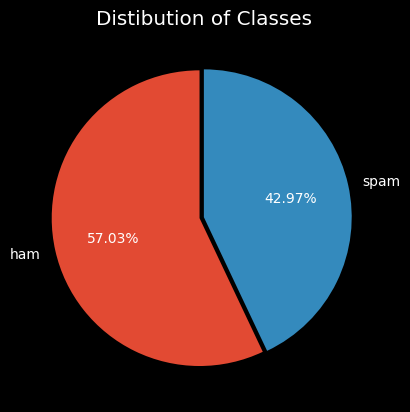

In [25]:
plt.style.use('ggplot')
target_distribution = df['target'].value_counts()
print(f'Target Distribution: {target_distribution}');
fig = plt.figure(facecolor='black')
#-----------------------------------------------

plt.pie(target_distribution,
        labels     = ['ham', 'spam'],
        textprops  = {'color': 'white'},
        startangle = 90, 
        autopct    = '%.2f%%', 
        explode    = [0.03,0])
plt.title('Distibution of Classes', color='white');

#### Checking for NaNs

In [26]:
df.isna().sum()

id          0
keyword     0
text        0
target      0
text_len    0
dtype: int64

#### Distribution of Text Length by Target Class

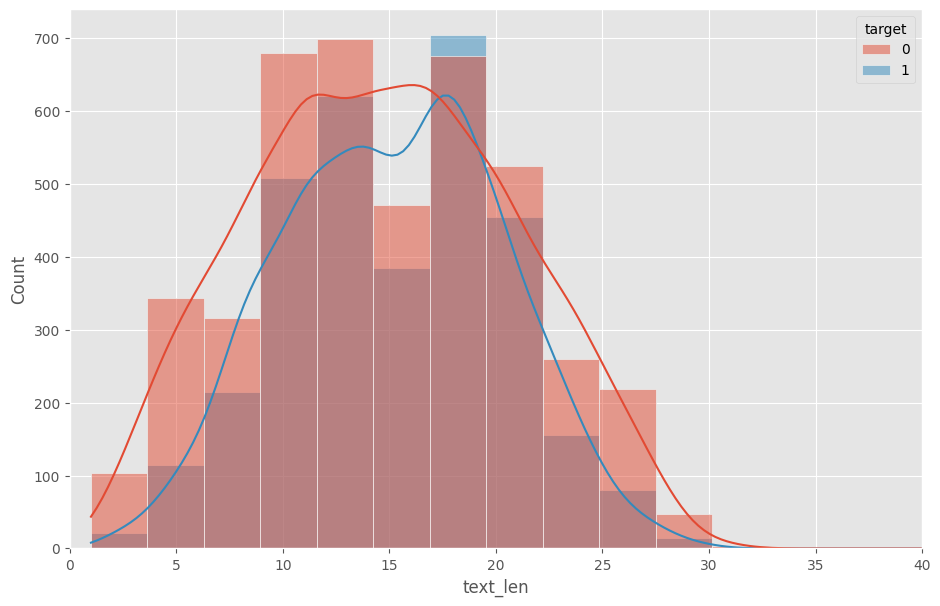

In [27]:
# Create Plot
fig, ax = plt.subplots(figsize=(11, 7))
sns.histplot(data = df,
             x    = 'text_len', 
             ax   = ax, 
             kde  = True, 
             hue  = 'target', 
             bins = 20)

ax.set_xlim(0, 40);

#### Visualizing Missing Values in DataFrame

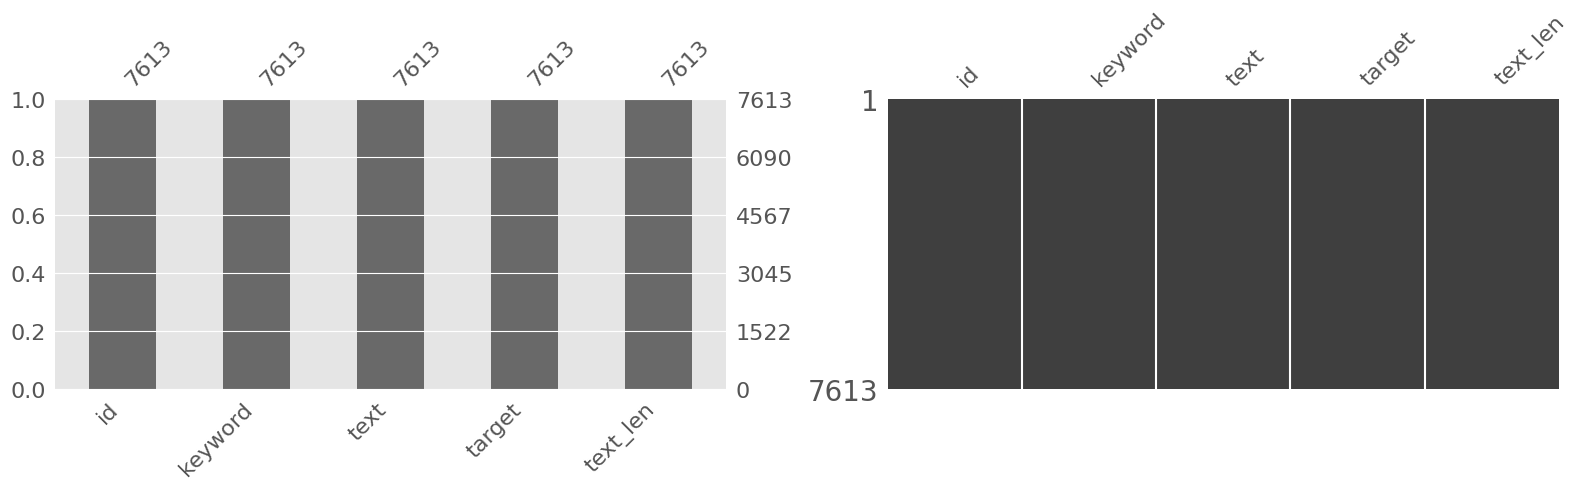

In [28]:

fig, ax = plt.subplots(1,2,figsize=(16, 5))
msno.bar(df, ax = ax[0])
msno.matrix(df, ax = ax[1])
#msno.dendrogram(df, ax = ax[2])
plt.tight_layout(); # msno.matrix(df, figsize=(10, 5));

#### Function Test: Removing URLs from Text Data

In [29]:
# Testing of remove_url function
n = 104
display(df.loc[n, 'text'])
remove_url(df.loc[n, 'text'])

'320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÂ\x89Ã\x9b_ http://t.co/weQPesENku'

'320 [IR] ICEMOON [AFTERSHOCK] |  | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÂ\x89Ã\x9b_ '

#### Loading and Inspecting the spaCy NLP Model

In [30]:
nlp = spacy.load('en_core_web_sm')
display(type(nlp))
display(nlp)

spacy.lang.en.English

#### Processing Text Data with spaCy | data type-->(String to Document Object)

In [31]:
print('\n',df.loc[n, 'text'], '\n')
print('Type:', type(df.loc[n, 'text']))
print('\n','-- '*40, '\n')

# create a doc variable
doc = nlp(df.loc[n, 'text'])
print(doc, '\n')
print('Type:',type(doc))


 320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÂÃ_ http://t.co/weQPesENku 

Type: <class 'str'>

 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --  

320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÂÃ_ http://t.co/weQPesENku 

Type: <class 'spacy.tokens.doc.Doc'>


#### Function sample test: Applying Text Cleaning Function to a Specific DataFrame Entry

In [7]:
print(df.loc[3839, 'text'])
text_clean(df.loc[3839, 'text'])

*NEW* Snap On Tools Black baseball Hat/Cap Silver/Gray Embroidered S Logo Flames - Full reÂÃ_ http://t.co/mO7DbBdFVR http://t.co/0ScNWe8XbV


'new snap tools black baseball hat cap silver gray embroidered logo flames full'

#### An example of keyword cleaning

In [9]:
#pd.set_option('display.max_rows', None)
df['clean_keyword'] = df['keyword'].apply(keyword_clean)
df['clean_keyword'] = df['clean_keyword'].replace('', 'unknown')

# Show an example
df.loc[137:137,['keyword', 'clean_keyword']]

,keyword,clean_keyword
137,airplane%20accident,airplane accident


### Cleaning text of the whole Dataframe 

In [11]:
pd.set_option('display.max_rows', None)
df['clean_text'] = df['text'].apply(text_clean)

# Location --> has been Dropped
#df['clean_location'] = df['location'].apply(text_clean)
#df['clean_location'] = df['clean_location'].replace('', 'unknown')
#df.loc[:,['clean_location', 'location']]

### Save DataFrame to CSV file

In [41]:

directory = r"D:\Visual Studio Code\NLP Disaster Tweets\Data"
csv_file_path = os.path.join(directory, "cleaned_df.csv")   # Save DataFrame as a pickle file in the specified directory
df.to_csv(csv_file_path, index=False)                       # Save DataFrame to CSV file

In [14]:

# df.to_csv('training_cleaned.csv')
# df.loc[:,['keyword', 'clean_keyword', 'clean_location', 'location']]
df.head()

,id,keyword,text,target,text_len,clean_keyword,clean_text
0,1,unknown,Our Deeds are the Reason of this #earthquake M...,1,13,unknown,deed reason earthquake may allah forgive
1,4,unknown,Forest fire near La Ronge Sask. Canada,1,7,unknown,forest fire near la ronge sask canada
2,5,unknown,All residents asked to 'shelter in place' are ...,1,22,unknown,resident ask shelter place notify officer evac...
3,6,unknown,"13,000 people receive #wildfires evacuation or...",1,9,unknown,people receive wildfire evacuation order calif...
4,7,unknown,Just got sent this photo from Ruby #Alaska as ...,1,17,unknown,get send photo ruby alaska smoke wildfire pour...


#### Summary of Missing Values in DataFrame

In [49]:
df.isna().sum()

id               0
keyword          0
text             0
target           0
text_len         0
clean_keyword    0
clean_text       0
dtype: int64

#### 2 Lines where the cleaned text has been cleared

In [58]:
df[(df['id'] == 6394) | (df['id'] == 9697)]

,id,keyword,text,target,text_len,clean_keyword,clean_text
4497,6394,hurricane,@Hurricane_Dame ???????? I don't have them they out here,1,9,hurricane,
6766,9697,tornado,@Ayshun_Tornado then don't,0,3,tornado,


--------------------
------------------

## Loading cleaned df if necessary

In [15]:
# Loading cleaned df as the cleaning step can consume time
df = pd.read_csv("..\\Data\\cleaned_df.csv", encoding="latin-1", index_col = 'id')
df.drop(['text'], axis = 1, inplace = True)
df.dropna(how = 'any', inplace = True)
df.head()

,keyword,target,text_len,clean_keyword,clean_text
id,,,,,
1,unknown,1,13,unknown,deed reason earthquake may allah forgive
4,unknown,1,7,unknown,forest fire near la ronge sask canada
5,unknown,1,22,unknown,resident ask shelter place notify officer evac...
6,unknown,1,9,unknown,people receive wildfire evacuation order calif...
7,unknown,1,17,unknown,get send photo ruby alaska smoke wildfire pour...


#### Summary of Missing Values in DataFrame

In [17]:
df.isna().sum()

keyword          0
target           0
text_len         0
clean_keyword    0
clean_text       0
dtype: int64

#### Plotting Top words for No disaster messages

Top words for No disaster messages



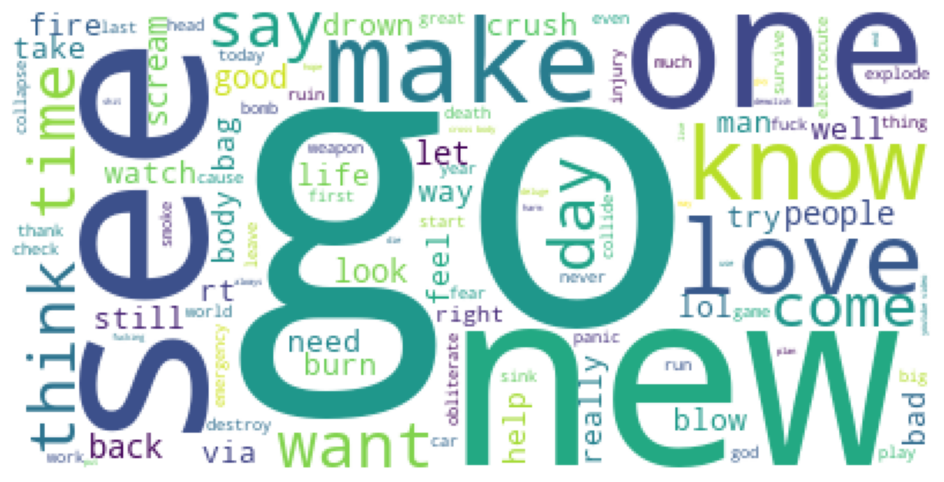

In [18]:

wc = WordCloud(background_color = 'white', 
               max_words        = 100, 
               )
wc.generate(' '.join(text for text in df.loc[df['target'] == 0, 'clean_text']))
plt.figure(figsize=(12,6))
# plt.title('Top words for Fake messages', 
#         fontdict={'size': 18,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
print('Top words for No disaster messages\n')

#### Plotting Top words for disaster messages

Top words for disaster messages



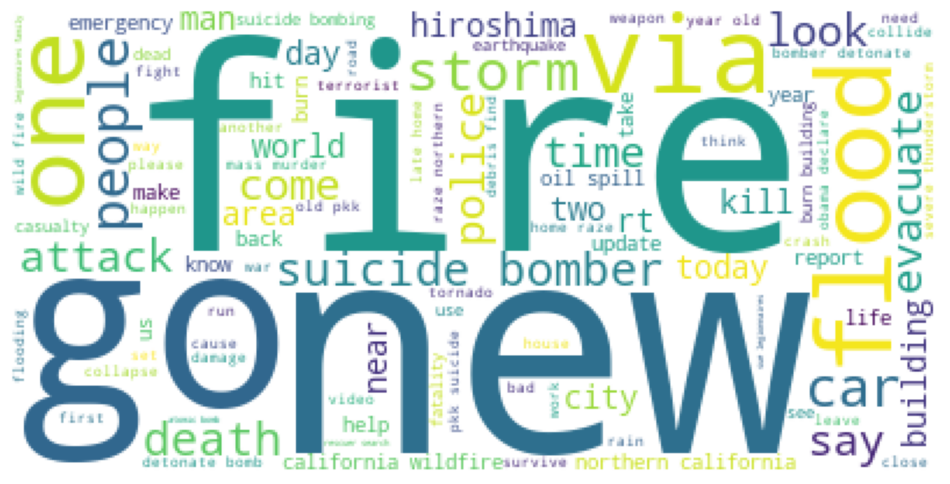

In [19]:
wc = WordCloud(background_color = 'white', 
               max_words        = 100)

wc.generate(' '.join(text for text in df.loc[df['target'] == 1, 'clean_text']))
plt.figure(figsize=(12,7))
#plt.title('Top words for Fake messages', 
#         fontdict={'size': 18,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
print('Top words for disaster messages\n')

#### Combining Text Columns and Dropping Redundant Columns

In [21]:
df['combined_text'] = df['clean_text'] + ' ' + df['clean_keyword'] # + ' ' + df['clean_location']
df.drop(['keyword', 'clean_keyword', 'clean_text'], axis = 1, inplace = True)
df.head()

,target,text_len,combined_text
id,,,
1,1,13,deed reason earthquake may allah forgive unknown
4,1,7,forest fire near la ronge sask canada unknown
5,1,22,resident ask shelter place notify officer evac...
6,1,9,people receive wildfire evacuation order calif...
7,1,17,get send photo ruby alaska smoke wildfire pour...


In [23]:
directory = r"D:\Visual Studio Code\NLP Disaster Tweets\Data"
csv_file_path = os.path.join(directory, "final_df.csv")   # Save DataFrame as a pickle file in the specified directory
df.to_csv(csv_file_path, index=False) 

-------------------------